In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json
from tqdm.notebook import tqdm_notebook as tqdm
import pickle

In [2]:
# Loading dictionary of dtype to embed
with open('../../data/dtype_to_embed.json', 'r') as f:
    dtype_to_embed = json.load(f)
    
with open('../../data/brain_behav_union.pkl', 'rb') as f:
    brain_behav_union = pickle.load(f)

len(brain_behav_union)    

47073

In [3]:
embed_counts = []
embed_vocs = {}
embed_path = '../../data/embeds/'
for f_name in tqdm(os.listdir(embed_path)):
    embed_name = f_name.split('.')[0]
    embed_voc = set(pd.read_csv(embed_path + f_name, index_col=0).index)
    
    # Subsetting to brain and behavior union
    embed_voc = embed_voc & brain_behav_union
    
    # Adding to counts and vocs
    embed_counts.append([embed_name, len(embed_voc)])
    embed_vocs[embed_name] = embed_voc

embed_counts = pd.DataFrame(embed_counts, columns=['name', 'count'])
embed_counts['log_count'] = np.log10(embed_counts['count'])
embed_counts = embed_counts.sort_values(by='count', ascending=False)
embed_counts

  0%|          | 0/27 [00:00<?, ?it/s]

,name,count,log_count
4,fastText_CommonCrawl,44443,4.647803
6,GloVe_CommonCrawl,44278,4.646188
3,LexVec_CommonCrawl,44082,4.644261
16,fastText_Wiki_News,43143,4.634910
11,CBOW_GoogleNews,42830,4.631748
17,fastTextSub_OpenSub,40607,4.608601
22,GloVe_Wikipedia,39421,4.595728
1,norms_sensorimotor,36854,4.566485
5,spherical_text_Wikipedia,35533,4.550632
21,GloVe_Twitter,32947,4.517816


In [4]:
with open('../../data/embed_to_dtype.json', 'r') as f:
    embed_to_dtype = json.load(f)

# Adding dtype column and renaming names
embed_counts['dtype'] = embed_counts['name'].map(embed_to_dtype)

# Renaming and reformating names
rename_dict = {'SVD_sim_rel': 'SVD_similarity_relatedness', 'compo_attribs': 'experiential_attributes'}
embed_counts['name'] = embed_counts['name'].replace(rename_dict)
embed_counts['name'] = embed_counts['name'].str.replace('_', ' ')
embed_counts

,name,count,log_count,dtype
4,fastText CommonCrawl,44443,4.647803,text
6,GloVe CommonCrawl,44278,4.646188,text
3,LexVec CommonCrawl,44082,4.644261,text
16,fastText Wiki News,43143,4.634910,text
11,CBOW GoogleNews,42830,4.631748,text
17,fastTextSub OpenSub,40607,4.608601,text
22,GloVe Wikipedia,39421,4.595728,text
1,norms sensorimotor,36854,4.566485,behavior
5,spherical text Wikipedia,35533,4.550632,text
21,GloVe Twitter,32947,4.517816,text


In [5]:
# Loading psychNorms data
norms = pd.read_csv('../../data/psychNorms/psychNorms.zip', compression='zip', index_col=0, low_memory=False)
meta = pd.read_csv('../../data/psychNorms/psychNorms_metadata.csv', index_col=0)

# Getting counts of each norm and sorting by count
norm_counts = norms.count().sort_values(ascending=False).reset_index()
norm_counts.columns = ['name', 'count']
norm_counts['category'] = (
    norm_counts['name'].map(meta['category'])
    .str.replace('_', ' ').str.title()
    .str.replace('Of', 'of', regex=True)
)

# Log transforming the counts
norm_counts['log_count'] = np.log10(norm_counts['count'])
norm_counts

,name,count,category,log_count
0,frequency_lund,79671,Frequency,4.901300
1,frequency_blog_gimenes,70646,Frequency,4.849088
2,frequency_twitter_gimenes,70646,Frequency,4.849088
3,frequency_news_gimenes,70646,Frequency,4.849088
4,context_diversity_blog_gimenes,70646,Semantic Diversity,4.849088
...,...,...,...,...
286,imageability_citron,300,Imageability,2.477121
287,aoa_citron,300,Age of Acquisition,2.477121
288,familiarity_citron,300,Familiarity,2.477121
289,arousal_citron,300,Arousal,2.477121


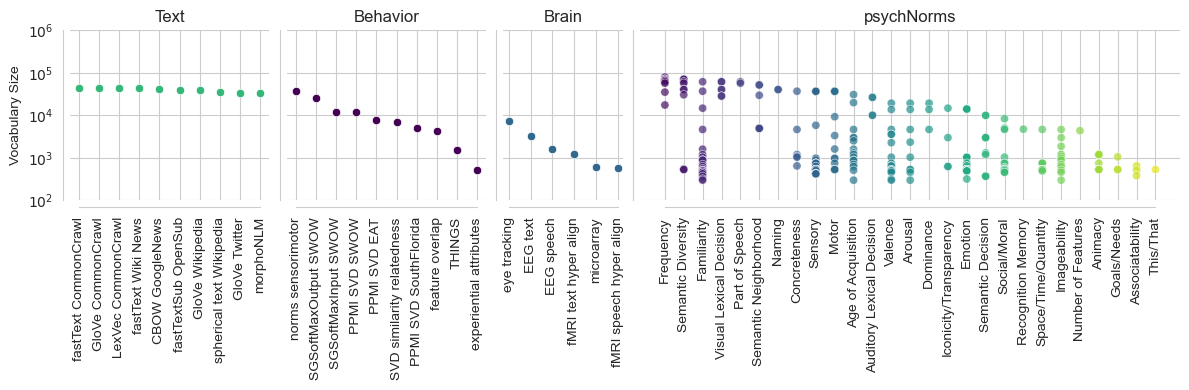

In [6]:
with open('../../data/dtype_to_embed.json', 'r') as f:
    dtype_to_embed = json.load(f)

width_ratios = [len(dtype_to_embed[dtype]) for dtype in ['text', 'behavior', 'brain']] + [len(norm_counts['category'].unique())]

# Colors 
cmap = plt.get_cmap('viridis', 4)
embed_type_to_color = {
    'brain': cmap(1),
    'behavior': cmap(0),
    'text': cmap(2)
}

fig, axs = plt.subplots(1, 4, figsize=(12, 4), width_ratios=width_ratios, sharey=True)

# Text embed counts
sns.scatterplot(
    embed_counts.query('dtype == "text"'), x='name', y='log_count', color=embed_type_to_color['text'],  ax=axs[0]
)
ymin, ymax = 2, 6
axs[0].set(
    ylim=(ymin, ymax), yticks=range(ymin, ymax+1), yticklabels=[f'$10^{i}$' for i in range(ymin, ymax+1)], 
    ylabel='Vocabulary Size', title='Text'
)

# Behavior embed counts
sns.scatterplot(
    embed_counts.query('dtype == "behavior"'), x='name', y='log_count', color=embed_type_to_color['behavior'], ax=axs[1]
)
axs[1].set(title='Behavior')

# Brain embed counts
sns.scatterplot(
    embed_counts.query('dtype == "brain"'), x='name', y='log_count', color=embed_type_to_color['brain'], ax=axs[2]
)
axs[2].set(title='Brain')

# Norms
sns.scatterplot(
    norm_counts, x='category', y='log_count', hue='category', palette='viridis', legend=False, alpha=0.7,
    ax=axs[3]
)
axs[3].set(title='psychNorms', yticks=range(ymin, ymax+1), ylabel='PAD')

for ax in axs:
    # rotate x-axis labels
    ax.tick_params(axis='x', rotation=90, labelsize=10)
    ax.set(xlabel='' )

# Adds ylabel to last plot by freeing it from the shared y-axis
axs[3].set(ylabel='Vocabulary Size')

sns.despine(offset=5, trim=True)
plt.tight_layout()
plt.savefig('../../figures/vocab_sizes.png', dpi=300)

## Descriptive stats

In [7]:
import requests
import zipfile
import io
from nltk.corpus import stopwords

In [8]:
# Groups by dtype and computes min and max
embed_counts['dtype'] = embed_counts['name'].map(embed_to_dtype)
dtype_mins_maxs = (
    embed_counts[['count', 'dtype']].groupby('dtype').agg(['min', 'max'])
    .apply(lambda x: x.apply(lambda y: f'{y:.2e}'))
)
dtype_mins_maxs.columns = ['min', 'max']
dtype_mins_maxs

,min,max
dtype,,
behavior,1.56e+03,1.56e+03
brain,6.26e+02,6.26e+02
text,3.28e+04,3.28e+04


**Investigating proportion of global coverage**

In [9]:
url = "https://www.ugent.be/pp/experimentele-psychologie/en/research/documents/subtlexus/subtlexus3.zip"

# Step 1: Download the ZIP file
response = requests.get(url)

with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    excel_file = z.namelist()[0]
    with z.open(excel_file) as f:
        freqs = pd.read_excel(f, usecols=['Word', 'FREQcount'], index_col=0).dropna()['FREQcount']

freqs

Word
the               1501908
to                1156570
a                 1041179
you               2134713
and                682780
                   ...   
Zoroastrian             1
Zoroastrianism          1
zugzwang                1
zygotes                 1
zymurgy                 1
Name: FREQcount, Length: 74286, dtype: int64

In [10]:
# Removing stop words
stop_words = set(stopwords.words('english'))
freqs = freqs[~freqs.index.isin(stop_words)]
freqs_tot = freqs.sum()

def compute_coverage(voc):
    return sum([freqs[word] for word in voc if word in freqs.index]) / freqs_tot

# Base vocabulary used to intersect with each embed vocabulary for all our analyses
base_vocab = set(norms.index).intersection(brain_behav_union)
print(f'Brain and behavior vocabularies cover {compute_coverage(base_vocab):.1%} of global frequencies')
print(f'Brain and behavior vocabularies contain {len(base_vocab):.2e} words')

Brain and behavior vocabularies cover 83.6% of global frequencies
Brain and behavior vocabularies contain 4.62e+04 words


In [11]:
embed_coverages = pd.Series([compute_coverage(voc) for voc in embed_vocs.values()])
print(f'Median proportion of global coverage: {embed_coverages.median():.1%}')
print(f'Median vocab size: {embed_counts["count"].median():.2e}')

Median proportion of global coverage: 65.7%
Median vocab size: 1.18e+04
